In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("explain.csv",
                names = ["x","y"],
                encoding = "SHIFT-JIS"
                )

df

,x,y
0,0,8.0
1,1,7.5
2,2,2.5
3,4,6.0
4,7,5.0
5,9,3.0
6,10,2.5


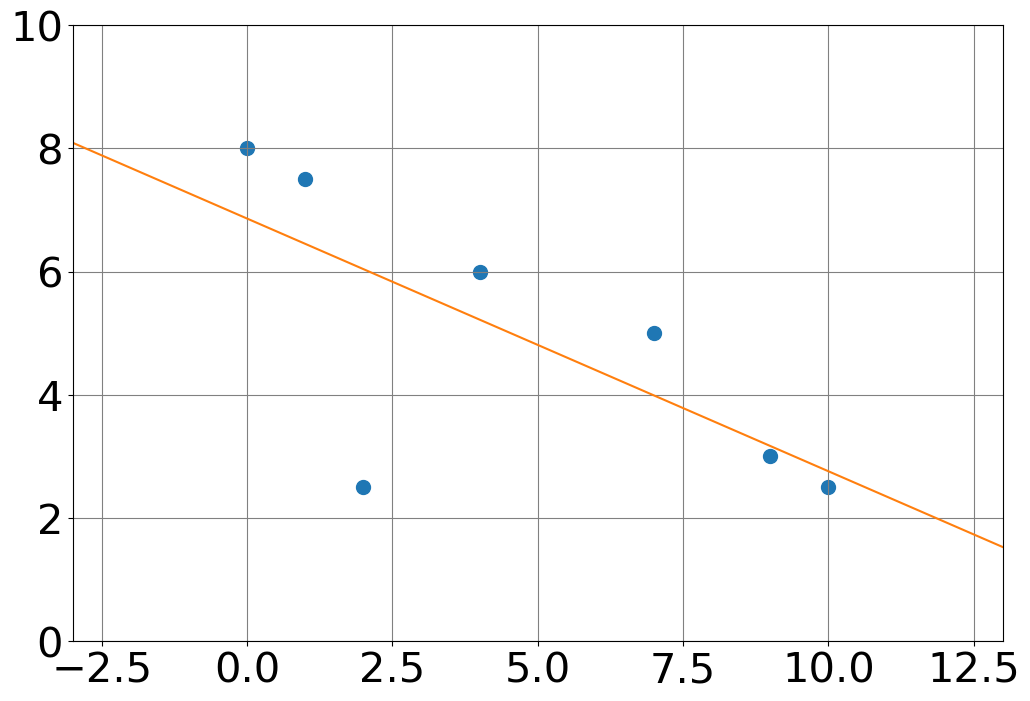

In [5]:
from scipy.optimize import curve_fit

def linear(x, a, b):
    y = a*x + b
    return y

popt, pcov = curve_fit(linear,df["x"],df["y"])
popt

fig1, ax1 = plt.subplots(1, 1, figsize=[12, 8])
ax1.tick_params(labelsize=30)
ax1.set_xlim(-3, 13)
ax1.set_ylim(0, 10)
ax1.grid(which="major", color="gray", linestyle="-")
ax1.scatter(df["x"],df["y"] ,color="tab:blue", s=100)

p =np.linspace(-3, 13, 150)

ax1.plot(p,linear(p , popt[0] , popt[1]),color="tab:orange")
#ax1.scatter(p,linear(p , popt[0] , popt[1]),color="tab:orange")


[ 2.38145369  0.99213719  2.25282292 -0.24706936  6.57561629]


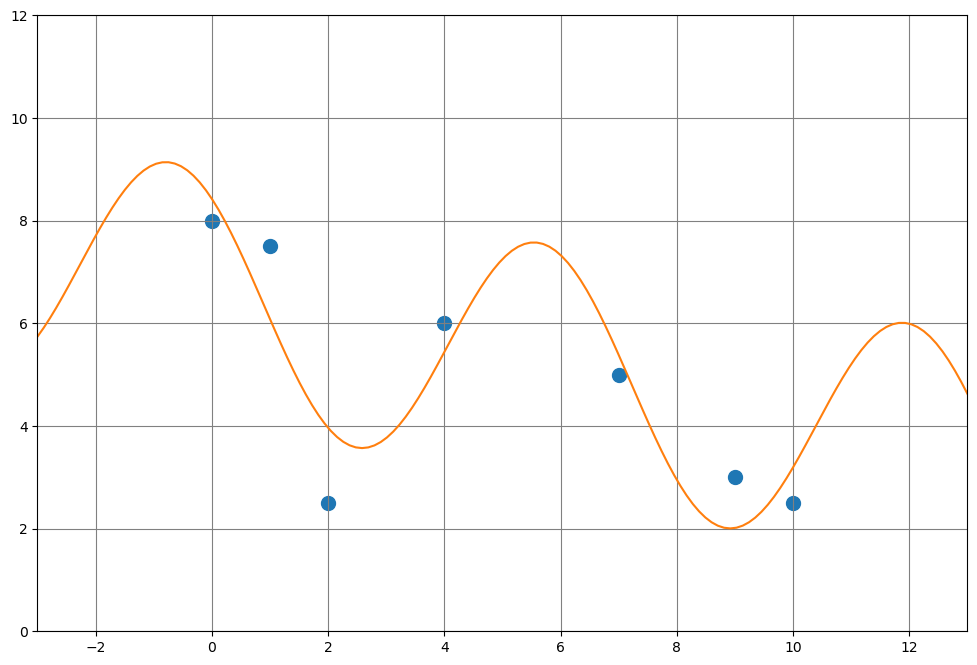

In [6]:
def sin_curve(x, a, b, c, d ,e):
    y = a*np.sin(b * x + c) +d*x +e
    return y

popt, pcov = curve_fit(sin_curve,df["x"],df["y"])
print(popt)

fig2, ax2 = plt.subplots(1, 1, figsize=[12, 8])
#ax2.tick_params(labelsize=30)
ax2.set_xlim(-3, 13)
ax2.set_ylim(0, 12)
ax2.grid(which="major", color="gray", linestyle="-")
ax2.scatter(df["x"],df["y"] ,color="tab:blue", s=100)
ax2.plot(p,sin_curve(p ,popt[0] ,popt[1], popt[2], popt[3],popt[4]),color="tab:orange")
#ax2.scatter(p,sin_curve(p ,popt[0] ,popt[1], popt[2], popt[3],popt[4]),color="tab:orange")

[ 0.00923225 -0.21892141  1.66015781 -4.55506328  8.58878403]


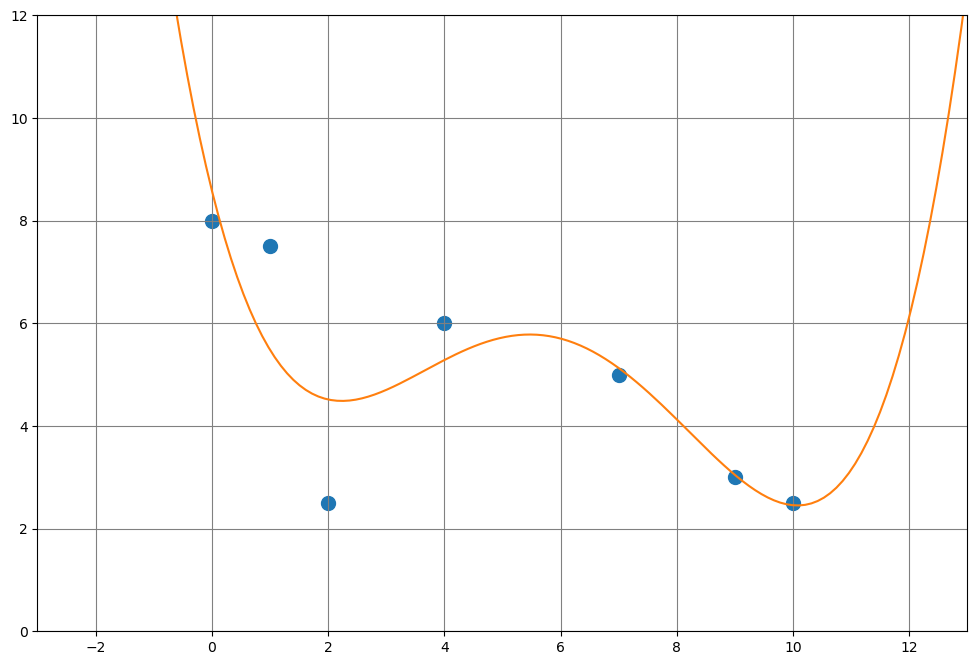

In [7]:
def four_dim_fanc(x, a, b, c, d ,e):
    y = a*x**4+b*x**3+c*x**2+d*x+e
    return y

popt, pcov = curve_fit(four_dim_fanc,df["x"],df["y"])
print(popt)

fig3, ax3 = plt.subplots(1, 1, figsize=[12, 8])
#ax3.tick_params(labelsize=30)
ax3.set_xlim(-3, 13)
ax3.set_ylim(0, 12)
ax3.grid(which="major", color="gray", linestyle="-")
ax3.scatter(df["x"],df["y"] ,color="tab:blue", s=100)
ax3.plot(p,four_dim_fanc(p ,popt[0] ,popt[1], popt[2], popt[3],popt[4]),color="tab:orange")
#ax3.scatter(p,sin_curve(p ,popt[0] ,popt[1], popt[2], popt[3],popt[4]),color="tab:orange")

[-4.66044582 -0.54545835  8.17276507  2.07383673 -0.40019145]


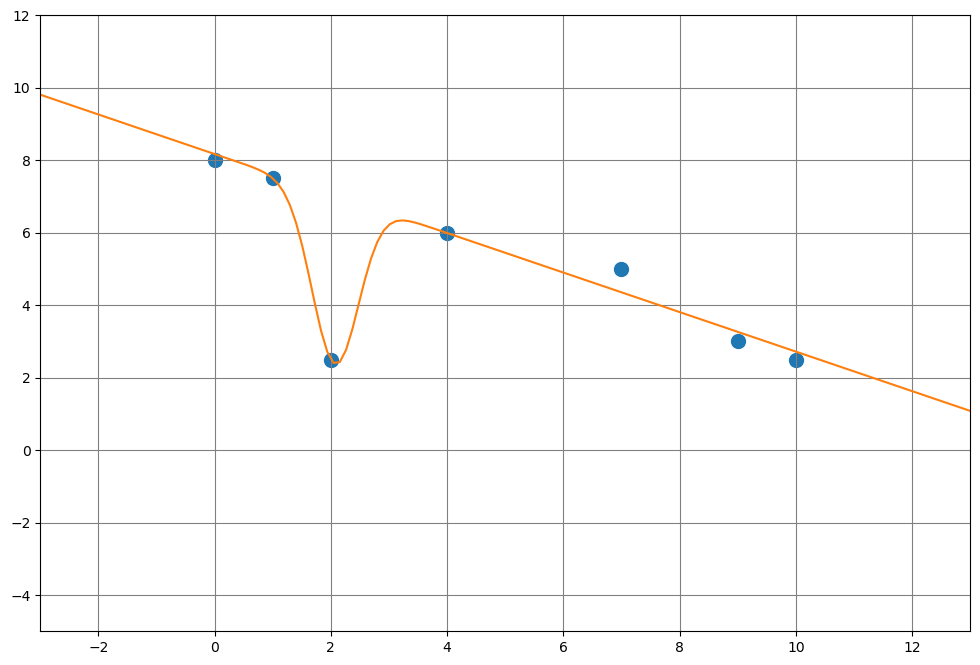

In [8]:
def gaussian(x, a, b ,c, mu, sigma):
    y = a*np.exp(-(x-mu)**2/(2*sigma**2)) + b*x+c
    return y
popt, pcov = curve_fit(gaussian,df["x"],df["y"])
print(popt)

fig4, ax4 = plt.subplots(1, 1, figsize=[12, 8])
#ax4.tick_params(labelsize=30)
ax4.set_xlim(-3, 13)
ax4.set_ylim(-5, 12)
ax4.grid(which="major", color="gray", linestyle="-")
ax4.scatter(df["x"],df["y"] ,color="tab:blue", s=100)
ax4.plot(p,gaussian(p ,popt[0] ,popt[1], popt[2], popt[3],popt[4]),color="tab:orange")
#ax4.scatter(p,sin_curve(p ,popt[0] ,popt[1], popt[2], popt[3],popt[4]),color="tab:orange")

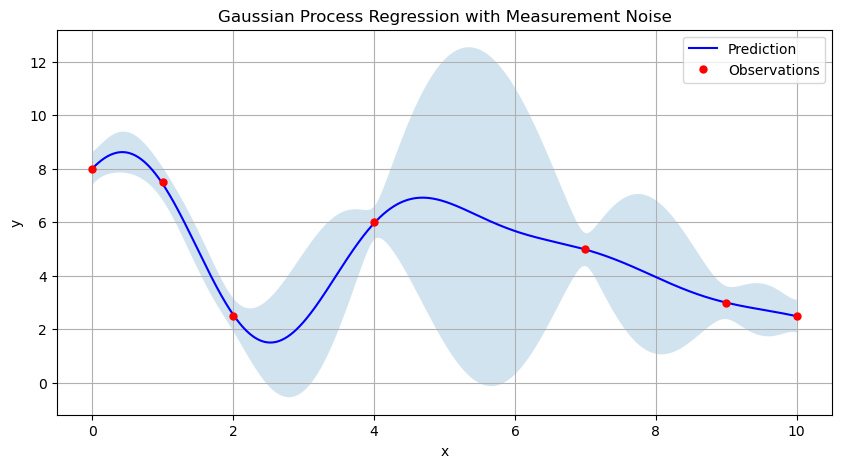

In [12]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import numpy as np
import matplotlib.pyplot as plt

# データフレーム df から x と y を取得
x = df["x"].values.reshape(-1, 1)
y = df["y"].values.reshape(-1, 1)

# ガウス過程回帰のカーネルを設定
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# 測定値のノイズの分散を alpha に設定
alpha = 0.1  # ノイズの分散の例（必要に応じて調整）

# GaussianProcessRegressor のインスタンスを作成
gp = GaussianProcessRegressor(kernel=kernel, alpha=alpha, n_restarts_optimizer=9)

# モデルの学習
gp.fit(x, y)

# 事後分布の推定と可視化
x_pred = np.linspace(0, 10, 1000).reshape(-1, 1)  # 予測する範囲を設定
y_pred, sigma = gp.predict(x_pred, return_std=True)

# 可視化
plt.figure(figsize=(10, 5))
plt.plot(x_pred, y_pred, 'b-', label='Prediction')
plt.fill_between(x_pred.ravel(), y_pred.ravel() - 1.96 * sigma, y_pred.ravel() + 1.96 * sigma, alpha=0.2)
plt.plot(x, y, 'r.', markersize=10, label='Observations')
plt.title('Gaussian Process Regression with Measurement Noise')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


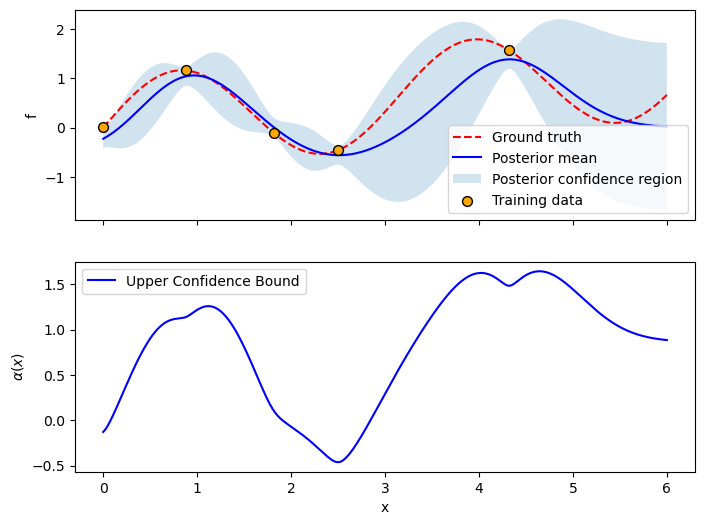

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Ground truth function
def ground_truth(x):
    return np.sin(2*x) + 0.2 * x

# サンプルデータの生成
np.random.seed(1)
X = np.random.uniform(0, 6, 5)[:, np.newaxis]
y_true = ground_truth(X).ravel()

# 観測値にノイズを追加
noise_std = 0.1
y = y_true + np.random.normal(0, noise_std, y_true.shape)

# ガウス過程回帰のカーネルを設定
kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=10)

# モデルの学習
gp.fit(X, y)

# 予測
x_pred = np.linspace(0, 6, 1000)[:, np.newaxis]
y_pred, sigma = gp.predict(x_pred, return_std=True)

# 獲得関数（例えば、Upper Confidence Bound）の計算
beta = 1.0  # βの値を設定
ucb = y_pred + beta * sigma

# 図の作成
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# 予測結果のプロット
ax1.plot(x_pred, ground_truth(x_pred), 'r--', label='Ground truth')
ax1.plot(x_pred, y_pred, 'b-', label='Posterior mean')
ax1.fill_between(x_pred.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='Posterior confidence region')
ax1.scatter(X, y_true, c='orange', s=50, zorder=10, edgecolors=(0, 0, 0), label='Training data')
ax1.set_ylabel('f')
ax1.legend()

# 獲得関数のプロット
ax2.plot(x_pred, ucb, 'b-', label='Upper Confidence Bound')
ax2.set_xlabel('x')
ax2.set_ylabel(r'$\alpha(x)$')
ax2.legend()

plt.show()


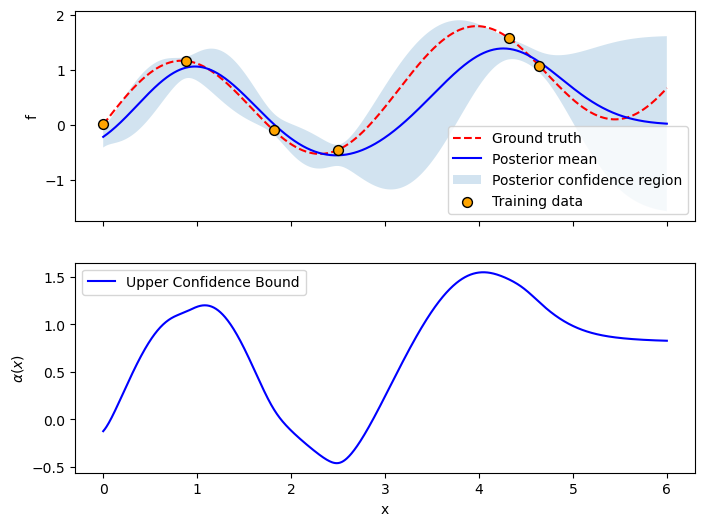

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Ground truth function
def ground_truth(x):
    return np.sin(2*x) + 0.2 * x

# サンプルデータの生成
np.random.seed(1)
X = np.random.uniform(0, 6, 5)[:, np.newaxis]
y_true = ground_truth(X).ravel()

# 観測値にノイズを追加
noise_std = 0.1
y = y_true + np.random.normal(0, noise_std, y_true.shape)

# ガウス過程回帰のカーネルを設定
kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=10)

# モデルの学習
gp.fit(X, y)

# 予測
x_pred = np.linspace(0, 6, 1000)[:, np.newaxis]
y_pred, sigma = gp.predict(x_pred, return_std=True)

# 獲得関数（例えば、Upper Confidence Bound）の計算
beta = 1.0  # βの値を設定
ucb = y_pred + beta * sigma

# 獲得関数が最大の点を見つける
next_sample_idx = np.argmax(ucb)
next_sample_x = x_pred[next_sample_idx]
next_sample_y_true = ground_truth(next_sample_x)
next_sample_y = next_sample_y_true + np.random.normal(0, noise_std)

# 新しい観測点を追加
X = np.vstack((X, next_sample_x))
y = np.append(y, next_sample_y)
y_true = np.append(y_true, next_sample_y_true)

# モデルを再学習
gp.fit(X, y)

# 新しい予測
y_pred, sigma = gp.predict(x_pred, return_std=True)

# 図の作成
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# 予測結果のプロット
ax1.plot(x_pred, ground_truth(x_pred), 'r--', label='Ground truth')
ax1.plot(x_pred, y_pred, 'b-', label='Posterior mean')
ax1.fill_between(x_pred.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='Posterior confidence region')
ax1.scatter(X, ground_truth(X), c='orange', s=50, zorder=10, edgecolors=(0, 0, 0), label='Training data')
ax1.set_ylabel('f')
ax1.legend()

# 獲得関数のプロット
ucb = y_pred + beta * sigma
ax2.plot(x_pred, ucb, 'b-', label='Upper Confidence Bound')
ax2.set_xlabel('x')
ax2.set_ylabel(r'$\alpha(x)$')
ax2.legend()

plt.show()


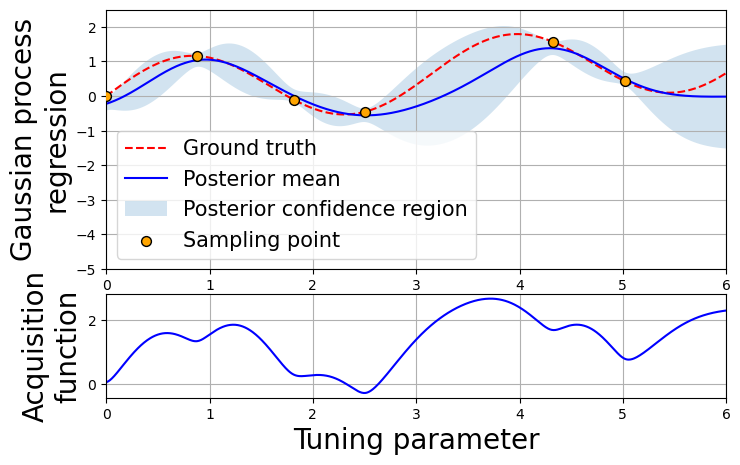

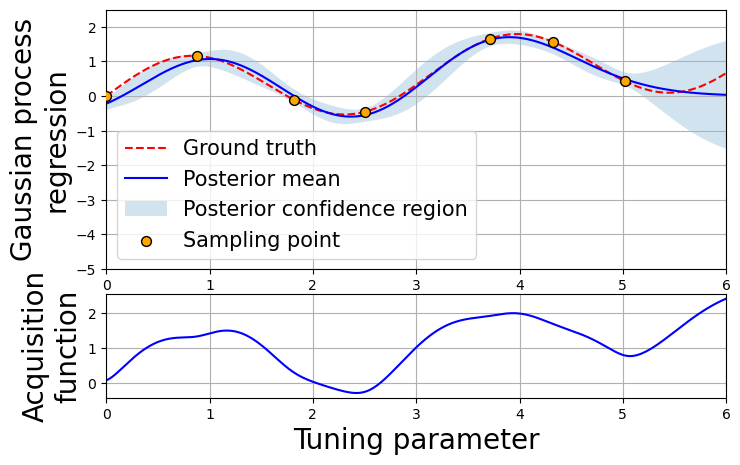

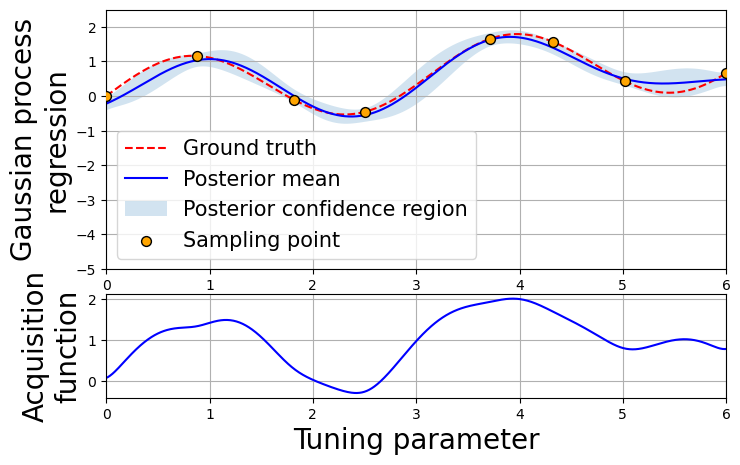

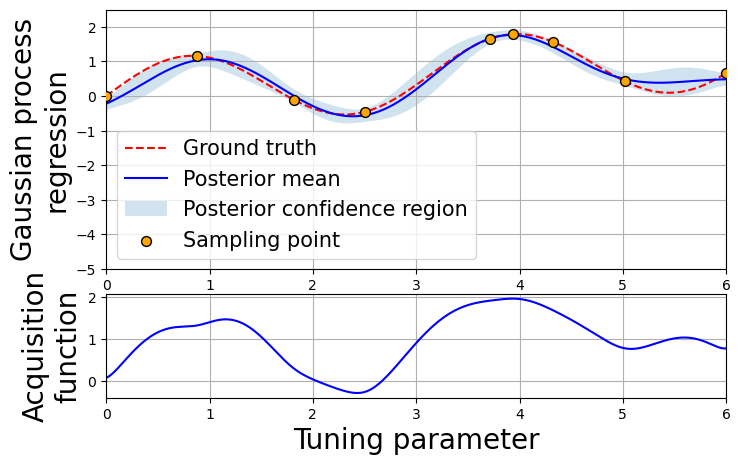

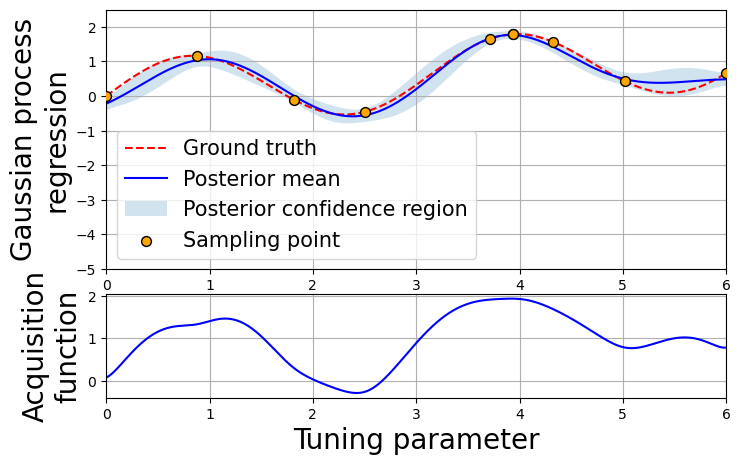

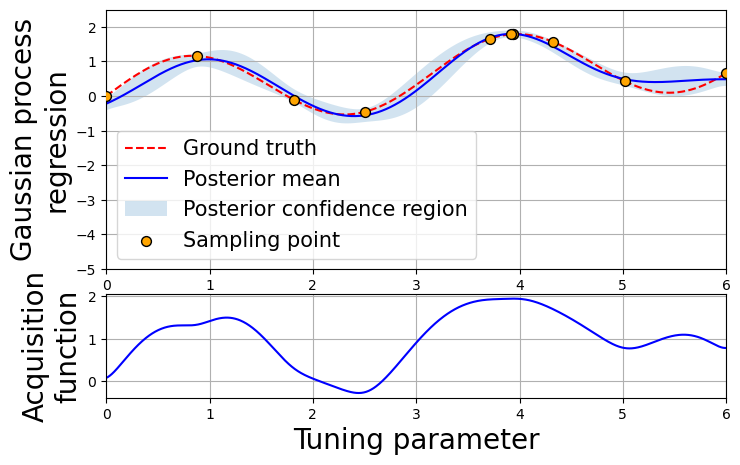

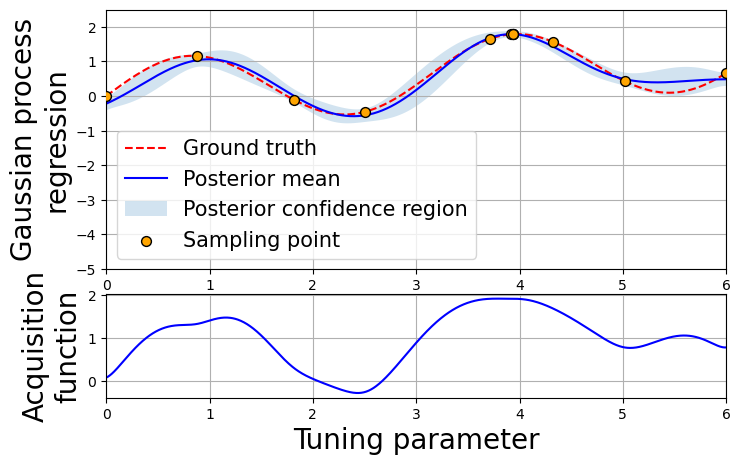

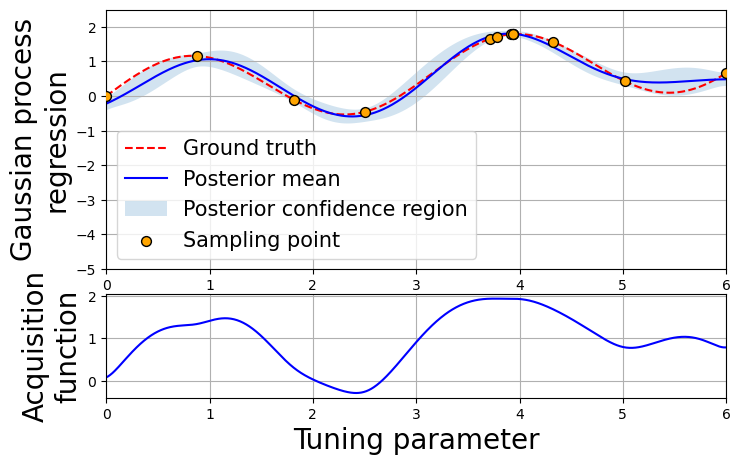

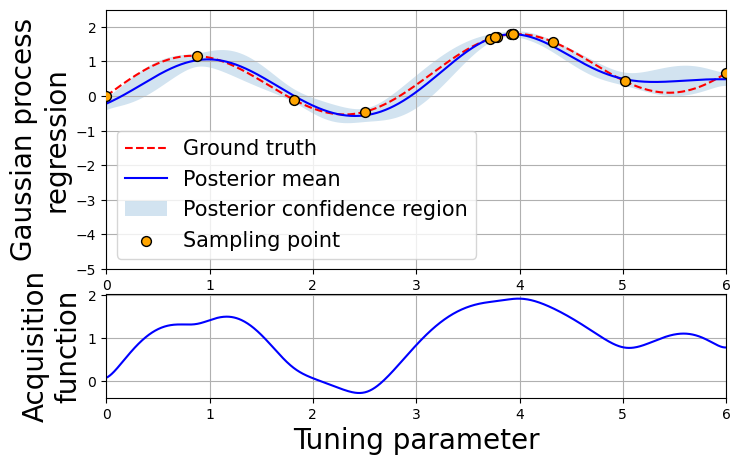

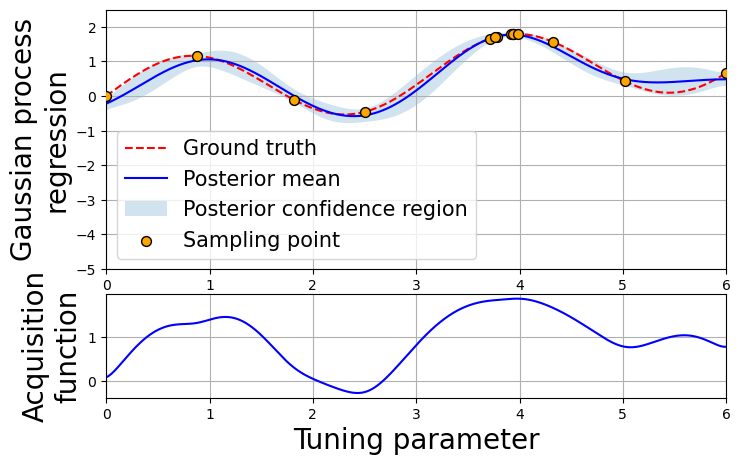

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Ground truth function
def ground_truth(x):
    return np.sin(2 * x) + 0.2 * x

# サンプルデータの生成
np.random.seed(1)
X = np.random.uniform(0, 6, 5)[:, np.newaxis]
y_true = ground_truth(X).ravel()

# 観測値にノイズを追加
noise_std = 0.1
y = y_true + np.random.normal(0, noise_std, y_true.shape)

# ガウス過程回帰のカーネルを設定
kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=10)

# モデルの学習
gp.fit(X, y)

for _ in range(10):
    # 予測
    x_pred = np.linspace(0, 6, 1000)[:, np.newaxis]
    y_pred, sigma = gp.predict(x_pred, return_std=True)

    # 獲得関数（例えば、Upper Confidence Bound）の計算
    beta = 3.0  # βの値を設定
    ucb = y_pred + beta * sigma

    # 獲得関数が最大の点を見つける
    next_sample_idx = np.argmax(ucb)
    next_sample_x = x_pred[next_sample_idx]
    next_sample_y_true = ground_truth(next_sample_x)
    next_sample_y = next_sample_y_true + np.random.normal(0, noise_std)

    # 新しい観測点を追加
    X = np.vstack((X, next_sample_x))
    y = np.append(y, next_sample_y)
    y_true = np.append(y_true, next_sample_y_true)

    # モデルを再学習
    gp.fit(X, y)

    # 新しい予測
    y_pred, sigma = gp.predict(x_pred, return_std=True)

    # 図の作成
    fig = plt.figure(figsize=(8,5.5))
    gs = GridSpec(3, 1, height_ratios=[5, 2, 0.2])  # 高さの比率を設定

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0])

    # 予測結果のプロット
    ax1.plot(x_pred, ground_truth(x_pred), 'r--', label='Ground truth')
    ax1.plot(x_pred, y_pred, 'b-', label='Posterior mean')
    ax1.fill_between(x_pred.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='Posterior confidence region')
    ax1.scatter(X, ground_truth(X), c='orange', s=50, zorder=10, edgecolors=(0, 0, 0), label='Sampling point')
    ax1.set_ylim(-5,2.5)
    ax1.set_xlim(0,6)
    ax1.set_ylabel('Gaussian process\nregression', fontsize=20)
    ax1.legend(loc='lower left', fontsize=15)
    ax1.grid(True)

    # 獲得関数のプロット
    ucb = y_pred + beta * sigma
    ax2.plot(x_pred, ucb, 'b-', label='Upper Confidence Bound')
    ax2.set_xlabel('Tuning parameter', fontsize=20)
    ax2.set_xlim(0,6)
    ax2.set_ylabel('Acquisition\nfunction', fontsize=20)
    #ax2.legend(loc='lower left', fontsize=12)
    ax2.grid(True)

    plt.show()
